In [304]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline



kappa = 0.75
size = 32
R = 2500
kappastr = f"{kappa:.2f}"
quantity = 6

fname_t= f"/Users/shanekeiser/Documents/ANNNI/populationannealing/data/t/emcx_data_{kappastr}_kappa_{size}_L_{R}_R.csv"
fname_p= f"/Users/shanekeiser/Documents/ANNNI/populationannealing/data/p/emcx_data_{kappastr}_kappa_{size}_L_{R}_R.csv"
info_name = f"/Users/shanekeiser/Documents/ANNNI/populationannealing/data/t/parameter_info_{kappastr}_kappa_{size}_L_{R}_R.csv" # just use 't' for simplicity

info = np.loadtxt(info_name, delimiter = ',', dtype = str, skiprows=1)
df_t = pd.read_csv(fname_t)
df_p = pd.read_csv(fname_p)
header = list(df_t)[quantity]

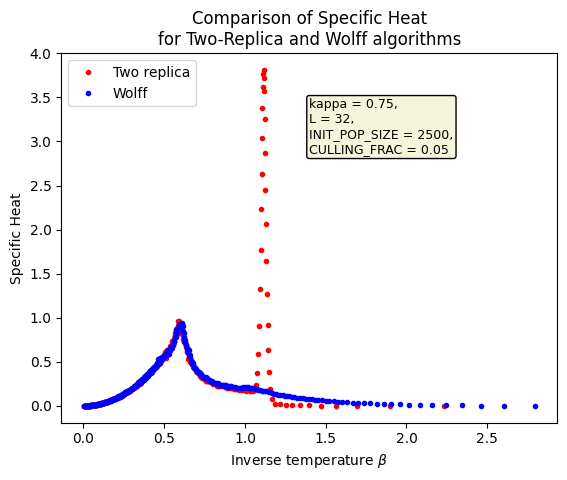

In [305]:
text_box = f"kappa = {info[0]},\nL = {info[1]},\nINIT_POP_SIZE = {R},\nCULLING_FRAC = {info[3]}"
fig, ax = plt.subplots()
ax.plot(df_t["Beta"], df_t[header], marker = '.', color = 'r', label = "Two replica", linewidth = 0)
ax.plot(df_p["Beta"], df_p[header], marker = '.', color = 'b', label = "Wolff", linewidth = 0)
ax.set_title(f"Comparison of {header}\nfor Two-Replica and Wolff algorithms")
ax.set_xlabel(r"Inverse temperature $\beta$")
ax.set_ylabel(f"{header}")
ax.legend()
ax.text(x = 0.5, y = 0.8, s = text_box,
         fontsize=9, color="black", ha="left", va="center",
         bbox=dict(facecolor="beige", edgecolor="black", boxstyle="round,pad=0.2"),
         transform = ax.transAxes)
plt.show()


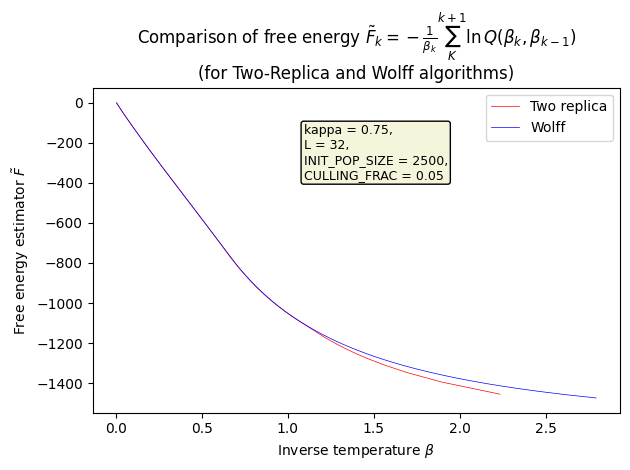

In [306]:
betaF_t = -1*df_t["Free Energy"]/df_t["Beta"]
betaF_p = -1*df_p["Free Energy"]/df_p["Beta"]
# print(betaF_t)
fig, ax = plt.subplots()
ax.plot(df_t["Beta"], betaF_t, markersize = 0, color = 'r', label = "Two replica", linewidth = 0.5)
ax.plot(df_p["Beta"], betaF_p, markersize = 0, color = 'b', label = "Wolff", linewidth = 0.5)
# ax.set_title(r"Comparison of free energy $F_k = - \frac{1}{\beta_k} \sum_{j=K}^{k+1} \ln Q(\beta_j, \beta_{j-1})$" + f"\n(for Two-Replica and Wolff algorithms)")
ax.set_title(r"Comparison of free energy $\tilde{F}_k = - \frac{1}{\beta_k} \sum_{K}^{k+1} \ln Q(\beta_k, \beta_{k-1})$" + f"\n(for Two-Replica and Wolff algorithms)")
ax.legend()
ax.set_xlabel(r"Inverse temperature $\beta$")
ax.set_ylabel(r"Free energy estimator $\tilde{F}$")
ax.text(x = 0.4, y = 0.8, s = text_box,
         fontsize=9, color="black", ha="left", va="center",
         bbox=dict(facecolor="beige", edgecolor="black", boxstyle="round,pad=0.2"),
         transform = ax.transAxes)
plt.tight_layout()
plt.show()




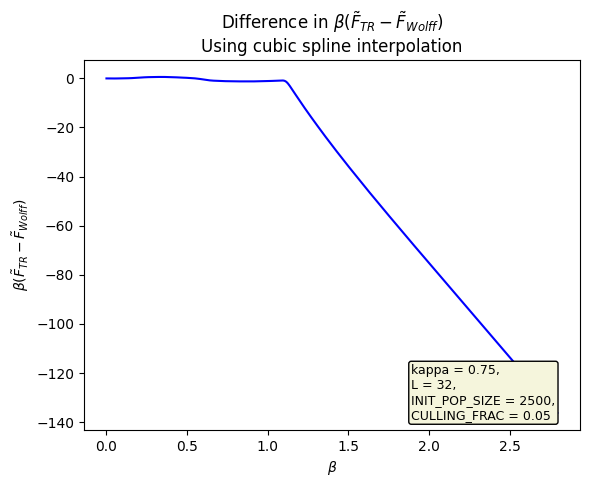

The above plot indicates that the TR method reaches lower free energies


In [307]:
t_FE_interp = make_interp_spline(df_t["Beta"][:-1], -1*df_t["Free Energy"][:-1], k = 3)
p_FE_interp = make_interp_spline(df_p["Beta"][:-1], -1*df_p["Free Energy"][:-1], k = 3)

beta_model = np.linspace(min(df_t["Beta"].min(), df_p["Beta"].min()),max(df_t["Beta"].max(), df_p["Beta"].max()),10000)

t_FE_model = t_FE_interp(beta_model)
p_FE_model = p_FE_interp(beta_model)

fig, ax = plt.subplots()
ax.plot(beta_model, t_FE_model - p_FE_model, color = 'b', label = "Difference between interpolated values")
ax.set_title(r"Difference in $\beta(\tilde{F}_{TR} - \tilde{F}_{Wolff})$" + "\nUsing cubic spline interpolation")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\beta(\tilde{F}_{TR} - \tilde{F}_{Wolff})$")
# ax.set_xlim(0,1.4)
# ax.set_ylim(-2,1)
ax.text(x = 0.66, y = 0.1, s = text_box,
         fontsize=9, color="black", ha="left", va="center",
         bbox=dict(facecolor="beige", edgecolor="black", boxstyle="round,pad=0.2"),
         transform = ax.transAxes)
plt.show()

print("The above plot indicates that the TR method reaches lower free energies")

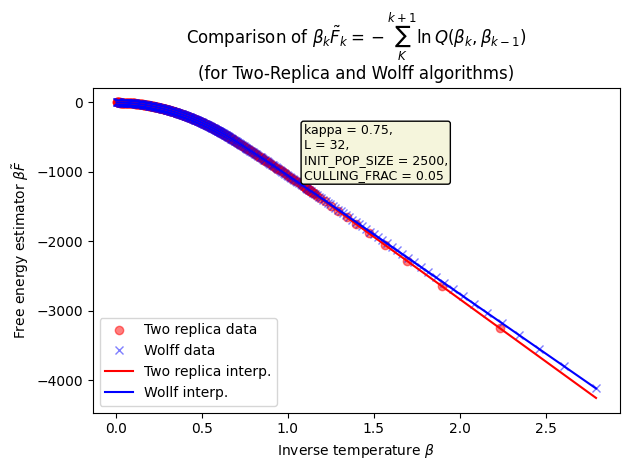

In [308]:
fig, ax = plt.subplots()
ax.plot(df_t["Beta"], -1*df_t["Free Energy"], marker = 'o', color = 'r', label = "Two replica data", linewidth = 0, alpha = 0.5)
ax.plot(df_p["Beta"], -1*df_p["Free Energy"], marker = 'x', color = 'b', label = "Wolff data", linewidth = 0, alpha = 0.5)
ax.plot(beta_model, t_FE_model, markersize = 0, color = 'r', label = "Two replica interp.")
ax.plot(beta_model, p_FE_model, markersize = 0, color = 'b', label = "Wollf interp.")
# ax.set_title(r"Comparison of free energy $F_k = - \frac{1}{\beta_k} \sum_{j=K}^{k+1} \ln Q(\beta_j, \beta_{j-1})$" + f"\n(for Two-Replica and Wolff algorithms)")
ax.set_title(r"Comparison of $\beta_k \tilde{F}_k = -\sum_{K}^{k+1} \ln Q(\beta_k, \beta_{k-1})$" + f"\n(for Two-Replica and Wolff algorithms)")
ax.legend()
ax.set_xlabel(r"Inverse temperature $\beta$")
ax.set_ylabel(r"Free energy estimator $\beta\tilde{F}$")
ax.text(x = 0.4, y = 0.8, s = text_box,
         fontsize=9, color="black", ha="left", va="center",
         bbox=dict(facecolor="beige", edgecolor="black", boxstyle="round,pad=0.2"),
         transform = ax.transAxes)
plt.tight_layout()
plt.legend()
plt.show()